<a href="https://colab.research.google.com/github/amrutahebli/DL_CNN-Projects/blob/master/Transfer_Learning_on_multi_class_Flower_Database_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import os
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix



In [ ]:
! pip install kaggle

In [2]:
!mkdir .kaggle

In [5]:
import json
#for key:  go to kaggle - 'My profile' --> 'Edit profile' --> 'API' --> 'Create new API Token' 
# --> Use that as key
token = {"username":"your username","key":"your key"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [6]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
#Configure the file
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [7]:
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d alxmamaev/flowers-recognition -p /content

 98% 441M/450M [00:04<00:00, 92.5MB/s]
100% 450M/450M [00:04<00:00, 106MB/s] 


In [9]:
root_path = '/content/flowers-recognition.zip'
zip_ref = zipfile.ZipFile(root_path,'r')
zip_ref.extractall('/content')

In [2]:
image_path= '/content/flowers'

In [11]:
!rm -rf '/content/flowers/flowers'

In [3]:
 vgg19 = VGG19(input_shape=(224,224,3), 
               include_top=False, 
               weights="imagenet")


In [4]:
for layer in vgg19.layers:
        layer.trainable = False

In [5]:
model = Sequential()
model.add(vgg19)
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Flatten())
model.add(Dense(5 , activation='softmax'))

In [6]:
 model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 23045     
Total params: 20,047,429
Trainable params: 23,045
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
list_image_labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
def data_preprocess(dir_path,image_size):
  data=[]
  flower_name= os.listdir(dir_path)
  for sub_name in flower_name:
    for file_name in os.listdir(os.path.join(dir_path,sub_name)):
      if file_name.endswith('.jpg'):
        path=os.path.join(dir_path,sub_name,file_name)
        img= cv2.imread(path)
        img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img= cv2.resize(img,(image_size,image_size))
        class_val=list_image_labels.index(sub_name)
        data.append([img,class_val])
  return np.array(data)


In [9]:
data = data_preprocess(image_path,224)

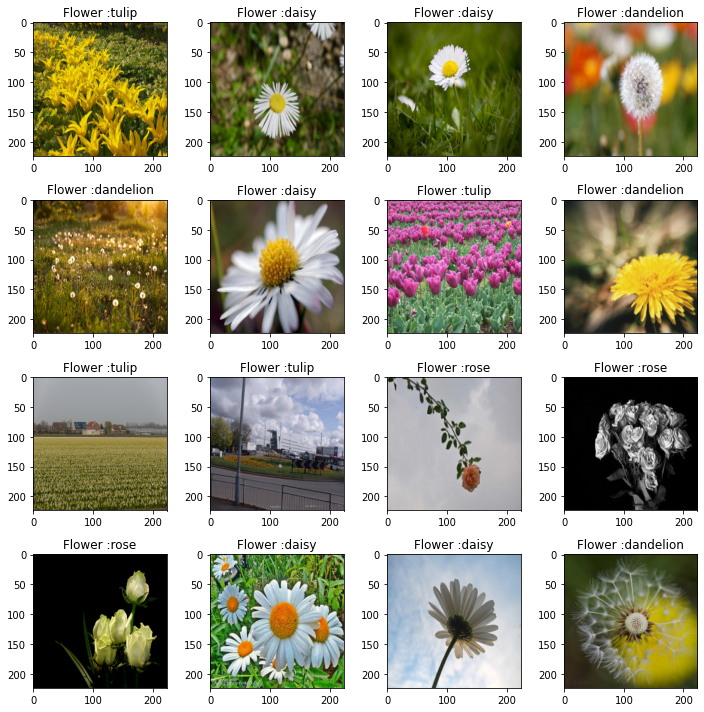

In [10]:
fig,ax=plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range(4):
  for j in range(4):
    rn=np.random.randint(0,len(data))
    ax[i,j].imshow(data[rn][0])
    ax[i,j].set_title("Flower :"+list_image_labels[data[rn][1]])
plt.tight_layout()


In [11]:
x=[]
y=[]
for feature, label in data:
  x.append(feature)
  y.append(label)

In [12]:
x=np.array(x)/255
y=np.array(y)

In [31]:
data=None # clearing previous variables to optimize ram


In [13]:
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [15]:
# clearning variables to optimize ram
x=None
y=None

In [16]:
history = model.fit(x_train,y_train, batch_size = 64 , epochs = 12 , 
                    validation_data =(x_test, y_test))

Epoch 1/12
55/55 [==============================] - 11s 206ms/step - loss: 1.0583 - accuracy: 0.5969 - val_loss: 0.7450 - val_accuracy: 0.7422
Epoch 2/12
55/55 [==============================] - 10s 178ms/step - loss: 0.6677 - accuracy: 0.7634 - val_loss: 0.6406 - val_accuracy: 0.7942
Epoch 3/12
55/55 [==============================] - 10s 178ms/step - loss: 0.5332 - accuracy: 0.8233 - val_loss: 0.6240 - val_accuracy: 0.7896
Epoch 4/12
55/55 [==============================] - 10s 178ms/step - loss: 0.4942 - accuracy: 0.8302 - val_loss: 0.5957 - val_accuracy: 0.7861
Epoch 5/12
55/55 [==============================] - 10s 179ms/step - loss: 0.4199 - accuracy: 0.8681 - val_loss: 0.5491 - val_accuracy: 0.8116
Epoch 6/12
55/55 [==============================] - 10s 179ms/step - loss: 0.3669 - accuracy: 0.8895 - val_loss: 0.5472 - val_accuracy: 0.8081
Epoch 7/12
55/55 [==============================] - 10s 178ms/step - loss: 0.3296 - accuracy: 0.9034 - val_loss: 0.5423 - val_accuracy: 0.8173

In [17]:
train_acc=history.history['accuracy']
train_loss=history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


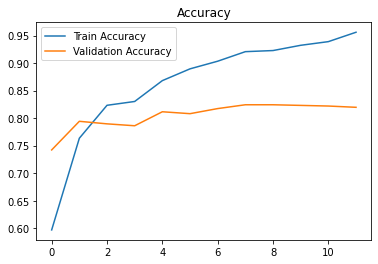

In [18]:
plt.figure()
plt.plot(train_acc,label='Train Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


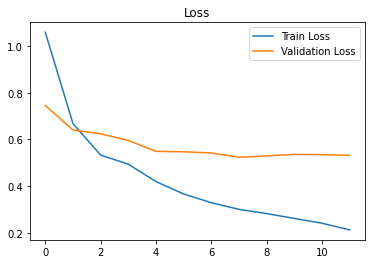

In [19]:
plt.figure
plt.plot(train_loss,label='Train Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [20]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
y_inv_test = label_binarizer.inverse_transform(y_test)


In [22]:
cm= confusion_matrix(y_inv_test,predictions)
cm

array([[124,  10,   7,   1,  12],
       [  7, 185,   3,   3,  12],
       [ 11,   3, 106,   3,  34],
       [  4,   5,   4, 121,  13],
       [  2,   6,  10,   6, 173]])

In [23]:
correct_class=[]
missed_class=[]

for i in range(len(y_inv_test)):
  if (y_inv_test[i] == predictions[i]):
    correct_class.append(i)
  if (len(correct_class)==8):
    break

for i in range(len(y_inv_test)):
  if (y_inv_test[i] != predictions[i]):
    missed_class.append(i)
  if (len(missed_class)==8):
    break



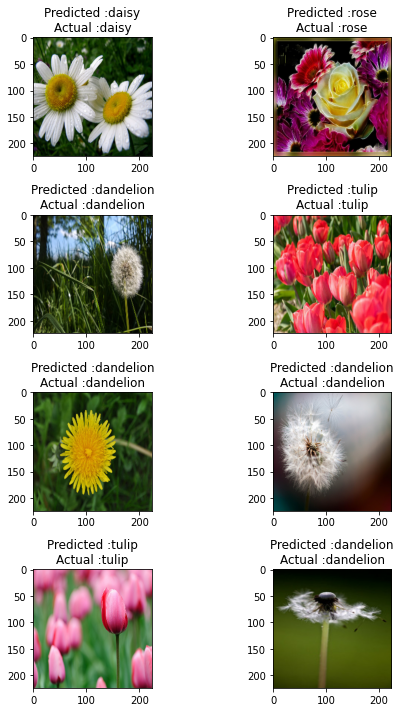

In [26]:
count=0

fig,ax=plt.subplots(4,2)
fig.set_size_inches(10,10)
for i in range(4):
  for j in range(2):
    ax[i,j].imshow(x_test[correct_class[count]])
    ax[i,j].set_title("Predicted :"+list_image_labels[predictions[correct_class[count]]]+"\n"+
                      "Actual :"+list_image_labels[y_inv_test[correct_class[count]]])
    count +=1
    plt.tight_layout()


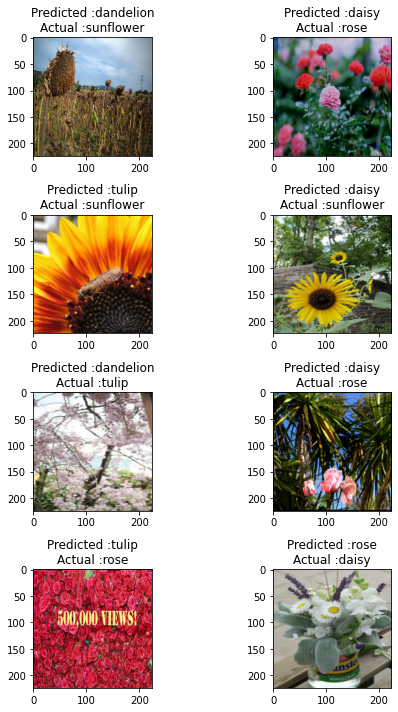

In [27]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(10,10)
for i in range(4):
  for j in range(2):
    ax[i,j].imshow(x_test[missed_class[count]])
    ax[i,j].set_title("Predicted :"+list_image_labels[predictions[missed_class[count]]]+"\n"+
                      "Actual :"+list_image_labels[y_inv_test[missed_class[count]]])
    count +=1
    plt.tight_layout()